# LTEE Fitness Inference Documentation

In [1]:
# Standard Imports
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

# Imports from fitness_mcmc package
import fitness_mcmc
import fitness_inference as f
import fitness_mcmc.data_io as io
import fitness_mcmc.fitness_mcmc as m
import fitness_mcmc.format_raw as raw

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Formatting raw barcode counts

To start with this pipeline, you need to ensure you have your data in one of two formats.

"population" should be a string naming the lineages

"environment" should be a string naming the assay media/conditions

"replicate" should be an integer of the replicate number

"day" should be an integer of the day the reads are from

1) a collection of files with the naming scheme: "population" _ "environment" _ "replicate" _ "day".
You will also need a barcode association file which you can input to the pipeline as a parameter. For further formatting guides on this method, please view files in the raw_data folder in fitness_mcmc. Place of your data files in this folder as well.

2) A single file with naming scheme: "output_label" _ "population" _ "environment" _ "replicate"
All barcode labels and counts for the entire assay in a single file, directly compatible with data_io, and your data should be placed in the experimental_data folder in fitness_mcmc. Formatting examples are there too. Viewing the regular documentation can help understand the data structure as well.

### Running the pipeline

Once your data files are formatted appropriately and in the correct folders, the pipeline is ready. This documentation will use real data from the LTEE as an example. Note that if the parameter doc=True, the function will return the fitness values and statisics as two arrays, but by default, these are written to a .csv file in the out folder in fitness_mcmc.

formatting done


C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


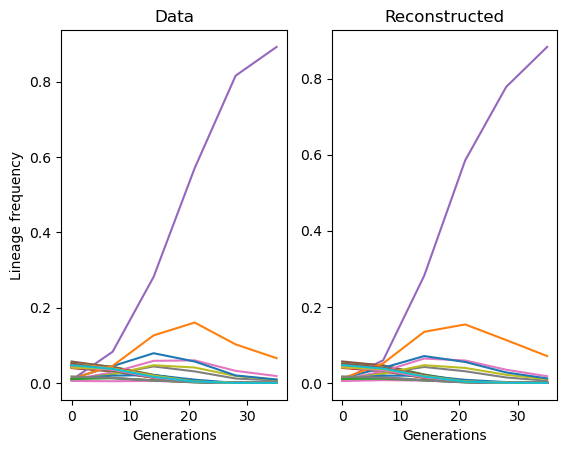

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


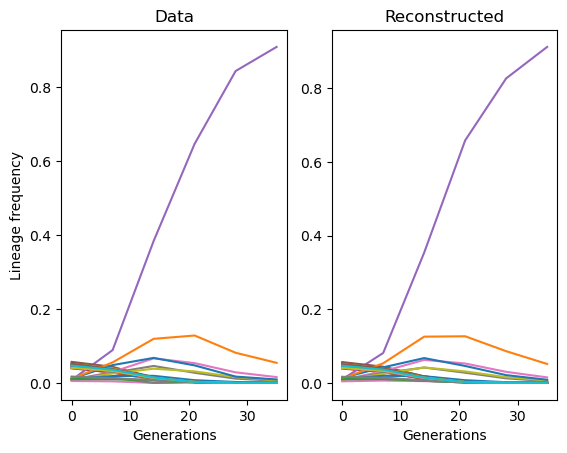

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


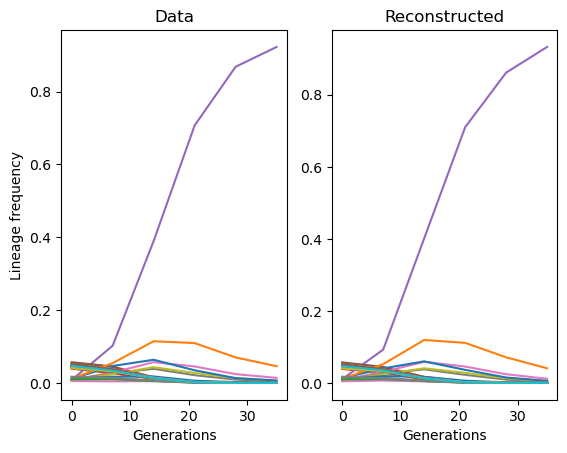

In [2]:
gens, s, stats = f.fitness_pipeline("LTEE", "pop2", "gluL", format=True, doc=True)

In [3]:
# Plotting Testing
print("start plot")
gens = raw.lineage_count("pop1", bc=True)
gens.sort()
vals = stats[:, 0]
errs = stats[:, 1]
plt.errorbar(gens, vals, errs, fmt='k:', capsize=3.0)
for i in range(0, 3):
    plt.scatter(gens, s[i])
plt.title('Home Environment Inferred Fitness')
plt.xlabel('Time (generations)')
plt.ylabel('Fitness')
out_file = raw.get_dir("LTEE_home_fitness.png", "out")
plt.savefig(out_file)
plt.show()
print("done")

start plot


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jedwa\\Documents\\Desai_Lab\\LTEE\\Fitness_code\\fitness_mcmc\\fitness_mcmc\\experimental_data\\pop1'